# Análise de dados do Titanic com tabelas e gráficos heatmap


In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


ANALISE DOS PASSAGEIROS DA PRIMEIRA CLASSE
CRITÉRIOS: Média da Idade, média de sexo em relação a Idade.
Média de genêro.

In [49]:
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [50]:
df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [51]:
#média por genêro

df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

# Anális de correlação 
Correlaciona coluna por linha em ordem agrupadas

Tabela correlacionada na ordem

Logo abaixo um heatmap (mapa de calor)

taxa de sobrevivente por cores

lado positivo quando se aproxima de 0,4
e negativo quando se aproxima de 1.0


In [45]:
corr =df.corr()
display(corr)

C:\Users\COMPLETA\AppData\Local\Temp\ipykernel_14048\2108938766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


C:\Users\COMPLETA\AppData\Local\Temp\ipykernel_14048\3794966665.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

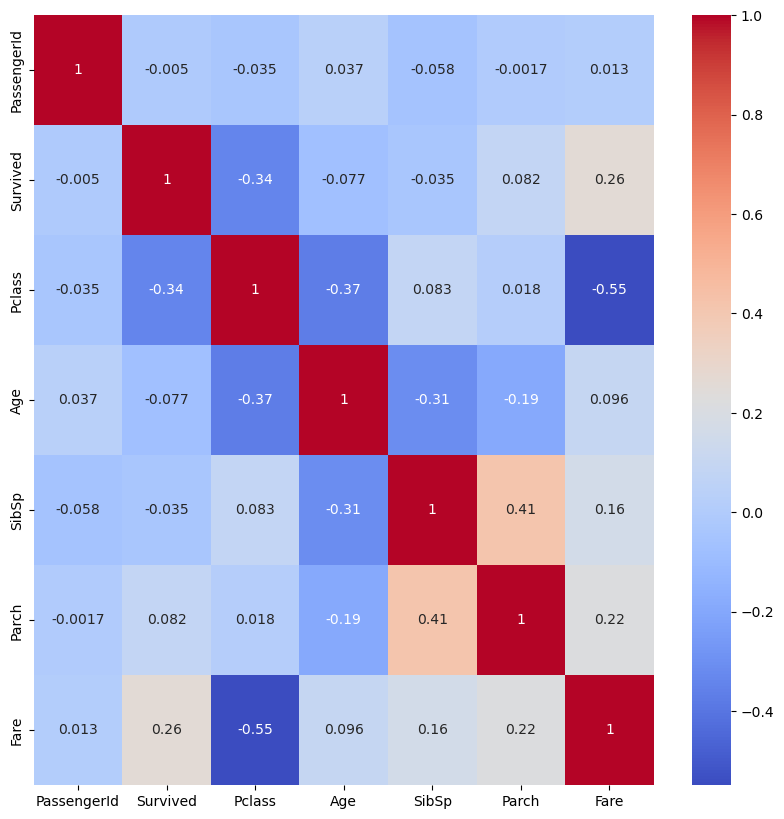

In [42]:
corr = df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Homens')

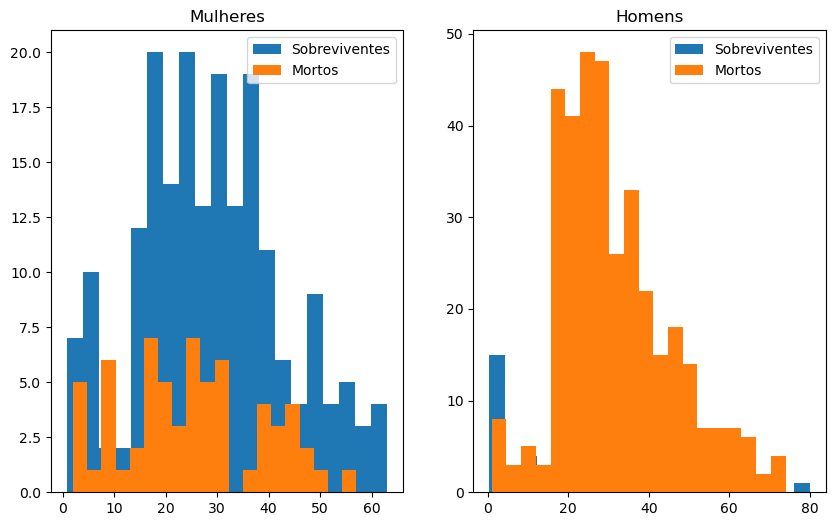

In [52]:
# separando os dados das mulheres e dos homens
import matplotlib.pyplot as pyplot

homens = df[df['Sex'] == 'male']
mulheres = df[df['Sex']=='female']
fig, axes = pyplot.subplots(1,2,figsize=(10,6))
axes[0].hist(mulheres[mulheres['Survived']==1].Age.dropna(),bins=20)
axes[0].hist(mulheres[mulheres['Survived']==0].Age.dropna(),bins=20)
axes[0].legend(['Sobreviventes', 'Mortos'])
axes[0].set_title('Mulheres')
axes[1].hist(homens[homens['Survived']==1].Age.dropna(),bins=20)
axes[1].hist(homens[homens['Survived']==0].Age.dropna(),bins=20)
axes[1].legend(['Sobreviventes', 'Mortos'])
axes[1].set_title('Homens') 